# SIMPLE LINEAR REGRESSION 

TO PREDICT PERCENTAGE SCORED ON BASIS OF HOURS STUDIED

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
student_scores = pd.read_csv("student_scores.csv")

In [15]:
student_scores.isna().sum()

Hours     0
Scores    0
dtype: int64

In [16]:
student_scores.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
student_scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [18]:
student_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


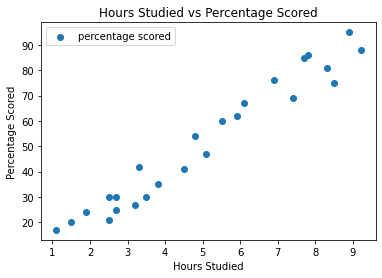

In [19]:
plt.scatter(student_scores['Hours'],student_scores['Scores'],label='percentage scored')
plt.title('Hours Studied vs Percentage Scored')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.legend(loc='upper left')

In [20]:
X = np.array(student_scores['Hours']).reshape(-1,1)
Y = np.array(student_scores['Scores'])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

score_predictor = LinearRegression()
score_predictor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
m = score_predictor.coef_
c = score_predictor.intercept_

print("coefficient: ", m)
print("intercept: ", c)

coefficient:  [9.91065648]
intercept:  2.018160041434683


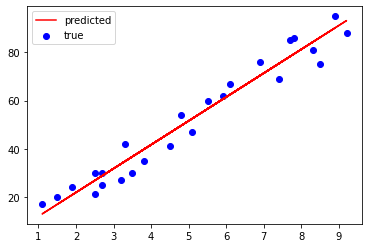

In [22]:
line = m * X + c

fig = plt.figure()
axes = fig.add_subplot(111)

axes.scatter(X,Y,c='b',label='true')
axes.plot(X,line,c='r',label='predicted')
plt.legend(loc='upper left')
plt.show()

In [23]:
y_pred = score_predictor.predict(x_test)

print("Root Mean Squared Error: ", sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error:  4.6474476121003665


In [24]:
print("Predicted score if student study for 9.25 hours in a day: ", (score_predictor.predict([[9.25]]))[0])

Predicted score if student study for 9.25 hours in a day:  93.69173248737538
